## Challenge : Fraud Detection

目標: 利用機器學習進行才遇詐騙預測

說明: 資料集為安隆公司詐欺案資料集(Enron Fraud Dataset)

## kaggle提交分數
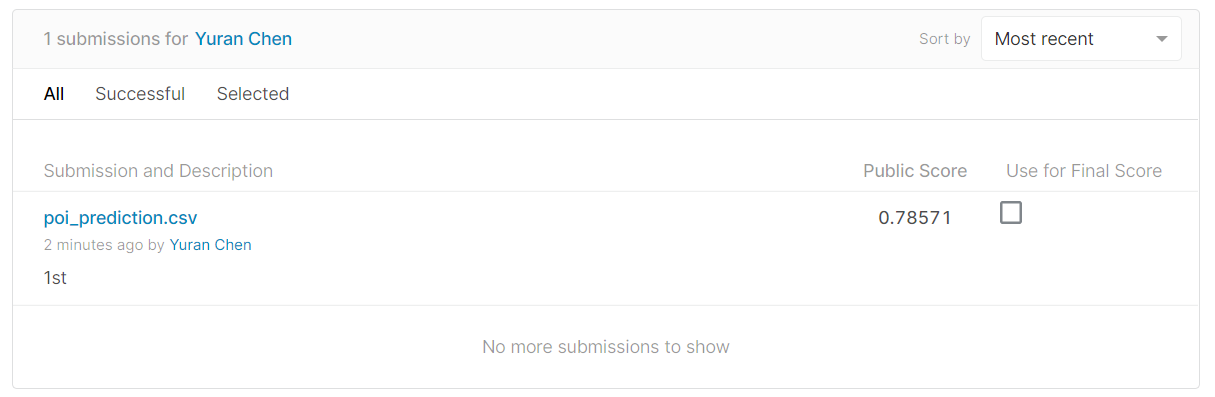

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
path = r'./data/test_features.csv'
test = pd.read_csv(path)
test.shape

(33, 21)

In [3]:
path = r'./data/train_data.csv'
train = pd.read_csv(path)
print(train.shape)
train


(113, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,...,NaN,356071.0,False,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0
109,BROWN MICHAEL,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,...,NaN,NaN,False,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,NaN,NaN,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0
111,HAUG DAVID L,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,...,NaN,NaN,False,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0


In [4]:
train_num = train.shape[0]
target = train[['poi']]
train = train.drop(['poi'], axis=1)
train = pd.concat([train, test])


print(f'train_num: {train_num} , train.shape: {train.shape}')

train

train_num: 113 , train.shape: (146, 21)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,BIBI PHILIPPE A,1000000.0,NaN,NaN,NaN,philippe.bibi@enron.com,1465734.0,38559.0,40.0,23.0,...,NaN,369721.0,425688.0,378082.0,NaN,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,SHERRIFF JOHN R,1500000.0,NaN,NaN,NaN,john.sherriff@enron.com,1835558.0,NaN,92.0,28.0,...,NaN,554422.0,1852186.0,1293424.0,NaN,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,GIBBS DANA R,NaN,504610.0,NaN,NaN,dana.gibbs@enron.com,2218275.0,NaN,12.0,0.0,...,NaN,461912.0,NaN,NaN,NaN,NaN,23.0,169.0,966522.0,2218275.0
31,LINDHOLM TOD A,200000.0,204075.0,NaN,NaN,tod.lindholm@enron.com,2549361.0,57727.0,NaN,NaN,...,NaN,175000.0,2630.0,514847.0,NaN,236457.0,NaN,NaN,875889.0,3064208.0


In [5]:
# 定義一個查看缺值的function
def check_na(df):
    list_temp=[]
    df_perc = (df.isnull().sum()/len(df))*100
    for i in df_perc.index:
        if df_perc[i] != 0:
            list_temp.append(i)
    df_perc = df_perc[list_temp].sort_values(ascending=False)
    df_perc = pd.DataFrame({'Missing Ratio':df_perc})
    display(df_perc)
check_na(train)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [7]:
# 這裡是填充na區
# 
fillna_list=['bonus','salary','loan_advances','restricted_stock_deferred','director_fees','deferral_payments',
            'deferred_income', 'long_term_incentive','total_payments','total_stock_value','restricted_stock','expenses',
            'to_messages','shared_receipt_with_poi','from_this_person_to_poi','from_messages','other','exercised_stock_options',
            'from_poi_to_this_person']

train[fillna_list] = train[fillna_list].fillna(0)


check_na(train)

,Missing Ratio
email_address,23.972603


In [8]:
#分析email特徵, 發現所有網域皆為enron.com或缺值, 故將其轉為label encoding (enron.com->1, nan->0)
train['email_address'] =train['email_address'].apply(lambda x:str(x).split('@')[-1])
train['email_address'] =train['email_address'].apply(lambda x:0 if str(x)=='nan' else 1) 

In [9]:
# bonus特徵差異大, 使用log標準化數據
bonus_list=['bonus','salary','long_term_incentive','total_payments','total_stock_value',
            'restricted_stock','expenses','to_messages','shared_receipt_with_poi','other','exercised_stock_options' ]

train[bonus_list] = np.log1p(train[bonus_list])

# deferred_income為負值, 故乘-1後取對數, 再乘-1
train['deferred_income'] = -np.log1p(-train['deferred_income'])


# total_stock_value,restricted_stock有一筆負值, np.log1p無法處裡,故給予該筆資料0 
train['total_stock_value'] = train['total_stock_value'].fillna(0)
train['restricted_stock'] = train['restricted_stock'].fillna(0)
check_na(train)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


,Missing Ratio


In [10]:
# label encoder區
# 唯有兩筆資料非缺值, 且有一個poi為true
train['loan_advances'] = LabelEncoder().fit_transform(train['loan_advances'])

In [11]:
# restricted_stock_deferred 對於poi似乎沒有什麼關聯性, 可考慮移除
train['restricted_stock_deferred']=train['restricted_stock_deferred'].apply(lambda x:-1 if x<0 else x)
train['restricted_stock_deferred']=train['restricted_stock_deferred'].apply(lambda x:1 if x>0 else x)

# director_fees 對於poi似乎沒有什麼關聯性, 可考慮移除
train['director_fees']=train['director_fees'].apply(lambda x:1 if x>0 else x)

# deferral_payments
train['deferral_payments'] = train['deferral_payments'].apply(lambda x:1 if x!=0 else x)

# from_this_person_to_poi  100次以下標記1, 其餘為0
train['from_this_person_to_poi_m'] = train['from_this_person_to_poi'].apply(lambda x:1 if x<50 else 0)

# from_poi_to_this_person
train['from_poi_to_this_person_m'] = train['from_poi_to_this_person'].apply(lambda x:1 if x>30 else 0)

# from_messages
train['from_messages_m'] = train['from_messages'].apply(lambda x:1 if x>10 else 0)

In [12]:
train[train['restricted_stock'].isnull()]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_m,from_poi_to_this_person_m,from_messages_m


In [13]:
test_name = train[['name']].iloc[train_num:,:]

In [14]:

train_temp = train.drop(['name'], axis =1)
train = train_temp.iloc[:train_num,:]
test = train_temp.iloc[train_num:,:]
print(f'train.shape: {train.shape} , test.shape: {test.shape}')

train.shape: (113, 23) , test.shape: (33, 23)


In [15]:
train.shape

(113, 23)

In [16]:
train = MinMaxScaler().fit_transform(train)
train_x, test_x, train_y, test_y = train_test_split(train, target, test_size=0.2, random_state=1)

In [17]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=7)

gbc.fit(train_x, train_y)

pred_y = gbc.predict(test_x)

acc = accuracy_score(test_y, pred_y)
print("Acuuracy: ", round(acc,3))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acuuracy:  0.87


In [18]:
test = MinMaxScaler().fit_transform(test)

pred_y = pd.DataFrame(gbc.predict_proba(test))

output = pd.DataFrame({'name':test_name['name'], 'poi':pred_y[1]})
output


,name,poi
0,BELDEN TIMOTHY N,0.000305
1,BOWEN JR RAYMOND M,0.000042
2,HANNON KEVIN P,0.000095
3,DELAINEY DAVID W,0.000073
4,CAUSEY RICHARD A,0.000073
5,HICKERSON GARY J,0.000037
6,FREVERT MARK A,0.000159
7,CHAN RONNIE,0.000037
8,DONAHUE JR JEFFREY M,0.000036
9,REYNOLDS LAWRENCE,0.000066


In [19]:
output.to_csv('poi_prediction.csv', index=False)